# Лабораторная работа 1: Основы Bayesian Optimization
Цель: Познакомиться с базовыми принципами Bayesian Optimization и научиться применять её для оптимизации функций.

Лабораторную работу выполнили студенты группы 22ПМИ-1: Иконников Александр, Спасюк Мария, Хуртин Алексей

In [1]:
!pip install scikit-optimize numpy matplotlib

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/107.8 kB ? eta -:--:--
   --- ------------------------------------ 10.2/107.8 kB ? eta -:--:--
   -------------- ------------------------ 41.0/107.8 kB 495.5 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/107.8 kB 495.5 kB/s eta 0:00:01
   -------------------------------------- 107.8/107.8 kB 567.2 kB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [1]:
from skopt import gp_minimize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Задание 1 (Легкий уровень): Оптимизация одной переменной

Оптимизируйте функцию  f(x)=(x−2)^2, используя библиотеку scikit-optimize.

1. Задайте диапазон значений для переменной x в пределах [−5,5].
2. Найдите значение x, при котором функция f(x) достигает минимума.
3. Визуализируйте процесс оптимизации, используя график.

In [64]:
def f(x):
    return (x[0]-2)**2

In [ ]:
result = gp_minimize(f, [(-5.0, 5.0)], acq_func = "EI", n_calls = 30)
result

In [66]:
print("Выбранные значения x на итерациях: ", result.x_iters)
print("Значения функции на каждой итерации: ", result.func_vals)

Выбранные значения x на итерациях:  [[3.2885658951801986], [1.900345492362061], [2.7276185830304165], [-4.661544370302524], [1.67906795153017], [2.5134944391941128], [-1.4723654174394092], [-0.12251424543175204], [0.6713247679872474], [-1.2900201385781092], [1.9723218390236896], [1.9995936539399306], [2.027199409525201], [1.952548231072618], [1.9951131492780245], [2.0931040269437196], [2.1082275918268216], [2.005052699460963], [2.002184259092461], [2.0375576820993127], [2.069569528904184], [1.9992726495099111], [2.0614030329914304], [2.0060914691110447], [2.065444052514196], [1.9918672722861475], [2.001706101105868], [1.9897051635833929], [2.00024957802576], [1.940574069480741]]
Значения функции на каждой итерации:  [1.66040207e+00 9.93102089e-03 5.29428802e-01 4.43761734e+01
 1.02997380e-01 2.63676539e-01 1.20573216e+01 4.50506672e+00
 1.76537787e+00 1.08242325e+01 7.66080595e-04 1.65117121e-07
 7.39807879e-04 2.25167037e-03 2.38813100e-05 8.66835983e-03
 1.17132116e-02 2.55297718e-05

In [67]:
print("Значение x, в котором достигается минимум: ", result.x[0])
print("Минимум функции: ", result.fun)

Значение x, в котором достигается минимум:  2.00024957802576
Минимум функции:  6.228919094219272e-08


Получили значение x, близкое к 2, а значение функции - близкое к 0

In [28]:
from skopt.plots import plot_gaussian_process, plot_objective

Визуализируем процесс оптимизации

c:\Users\PCUserName\anaconda3\Lib\site-packages\skopt\learning\gaussian_process\gpr.py:355: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


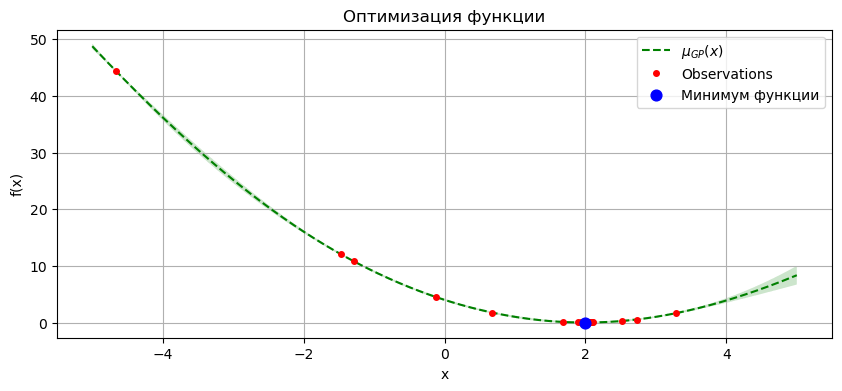

In [ ]:
plt.rcParams["figure.figsize"] = (10, 4)
graph = plot_gaussian_process(result)
plt.title("Оптимизация функции")
plt.scatter(result.x[0], result.fun, s = 60, c = "blue", label = "Минимум функции", zorder = 5)
plt.legend()
plt.show()


# Задание 2 (Средний уровень): Оптимизация двумерной функции

1. Оптимизируйте функцию f(x,y)=(x−2)^2+(y+3)^2, используя scikit-optimize.
2. Определите диапазон значений для переменной x в пределах [−5,5].
3. Найдите оптимальные значения x и y, при которых функция достигает минимума.
4. Постройте 3D-график поверхности функции и отобразите процесс оптимизации на этом графике.

In [72]:
def f(x):
    return (x[0]-2)**2+(x[1]+3)**2

In [73]:
result = gp_minimize(f, [(-5.0, 5.0), (-5.0, 5.0)], acq_func = "EI", n_calls = 40)
print("x, y, в которых достигается минимум функции: ", (result.x[0], result.x[1]))
print("Минимум функции: ", result.fun)

x, y, в которых достигается минимум функции:  (2.0010058933578145, -2.99928053861792)
Минимум функции:  1.529446127599562e-06


Получили значения x,y близкими к (2, -3), а значение f близкое к 0

In [ ]:
print(result)

Визуализируем процесс оптимизации

In [85]:
from matplotlib import cm
def plot_3d(fun, a=-8, b=10, c=-8, d=8, trace=None, x_value = 0, y_value = 0, f_value = 0):
    fig = plt.figure()

    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)

    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())
    ax.scatter(x_value, y_value, f_value, s = 60, c = "blue", label = "Минимум функции", zorder = 5)
    ax.legend()

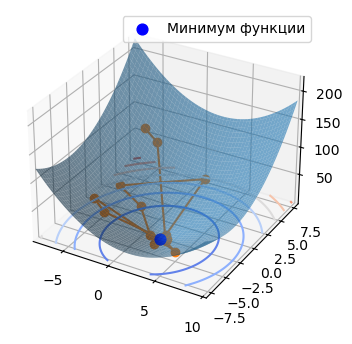

In [86]:
func = lambda x, y: (x-2)**2+(y+3)**2
plot_3d(func, trace=np.array(result.x_iters), x_value = result.x[0], y_value = result.x[1], f_value = result.fun)


# Задание 3 (Сложный уровень): Оптимизация функции с ограничениями

Оптимизируйте функцию f(x,y)=x^2+y^2, но добавьте ограничения:

x^2+y^2≥4 (точка должна находиться вне окружности радиуса 2).
x+y≤1 (точка должна находиться ниже прямой x+y=1).

Цель: найти минимальное значение f(x,y) с учетом заданных ограничений.

Используйте skopt.gp_minimize и настройте функцию так, чтобы она возвращала "штраф" при нарушении ограничений.
Визуализируйте область поиска, ограничения и траекторию оптимизации.



In [93]:
def ogr_function(x):
    shtraph = 0
    if x[0]**2 + x[1]**2 < 4:
        shtraph += 1000 / (4 - (x[0]**2 + x[1]**2))
    if x[0] + x[1] > 1:
        shtraph += 1000 / ((x[0] + x[1]) - 1)
    return x[0]**2 + x[1]**2 + shtraph

result = gp_minimize(ogr_function, [(-3.0, 3.0), (-3.0, 3.0)], acq_func = "EI", random_state = 10, n_calls = 40)
print("Значения x и y, в которых достигается минимум функции при ограничениях: ", (result.x[0], result.x[1]))
print("Минимальное значение функции: ", result.fun)


Значения x и y, в которых достигается минимум функции при ограничениях:  (-1.9778252040502113, -0.3632133758082676)
Минимальное значение функции:  4.043716494142298


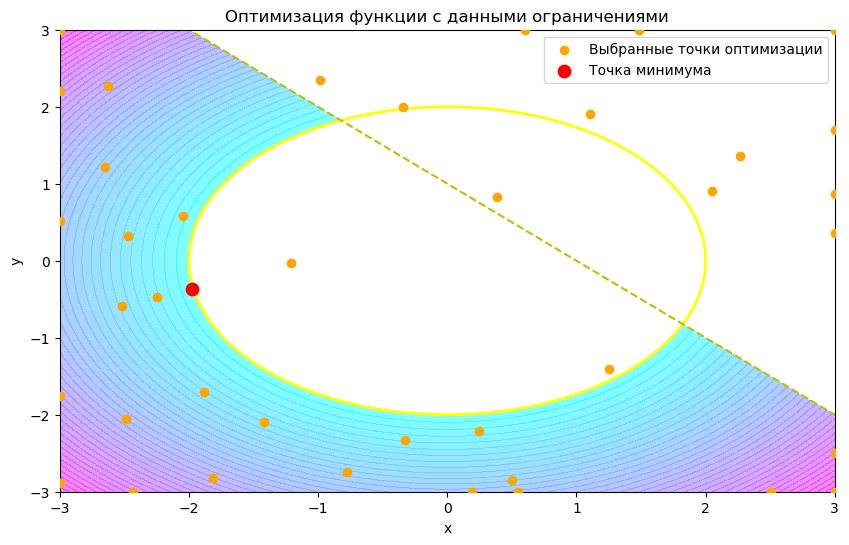

In [94]:
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
F = X**2 + Y**2
circle_restrict = (X**2 + Y**2 >= 4)
line_restrict = (X + Y <= 1)
F[~(circle_restrict)] = np.nan
F[~(line_restrict)] = np.nan
fig, ax = plt.subplots(figsize=(10, 6))
ax.contourf(X, Y, F, levels=40, cmap="cool", alpha=0.5)
circle = plt.Circle((0, 0), 2, color="yellow", fill=False, linewidth=2)
ax.add_artist(circle)
x_line = np.linspace(-3, 3, 400)
y_line = 1 - x_line
ax.plot(x_line, y_line, "y--")

ax.scatter([x[0] for x in result.x_iters], [x[1] for x in result.x_iters], c="orange", label="Выбранные точки оптимизации", zorder=5)
ax.scatter(result.x[0], result.x[1], c="red", s=80, label="Точка минимума", zorder=7)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Оптимизация функции с данными ограничениями")
ax.legend()
plt.show()